In [1]:
import pandas as pd

In [41]:
df = pd.read_csv('gemstone.csv')

In [42]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [43]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [45]:
df = df.drop('id', axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [46]:
df.duplicated().sum()

0

In [47]:
num_cols = df.columns[df.dtypes != 'O']
cat_cols = df.columns[df.dtypes == 'O']
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [48]:
df.cut.value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [49]:
df.color.value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [50]:
df.clarity.value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

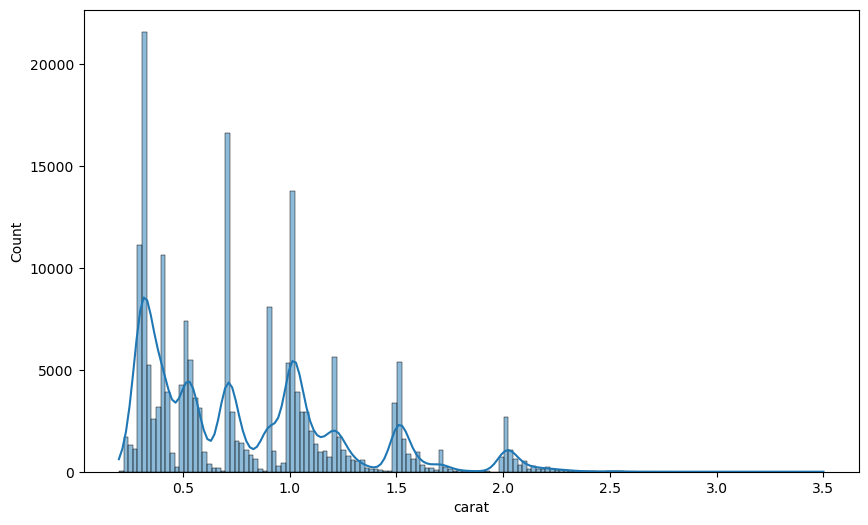

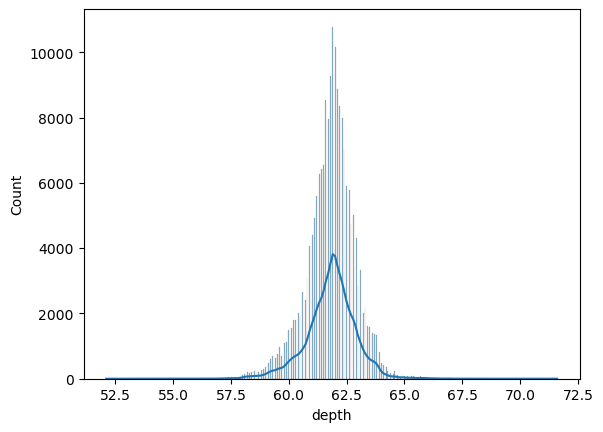

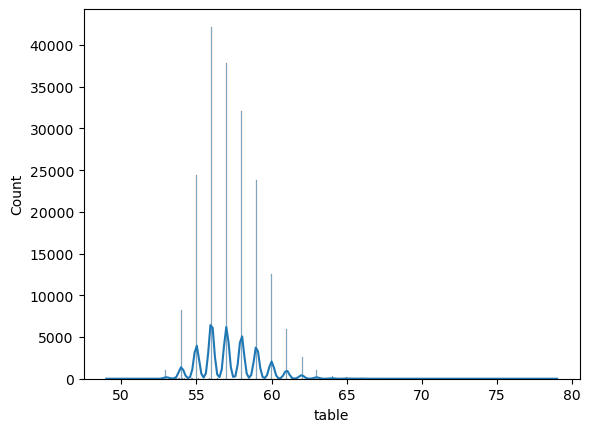

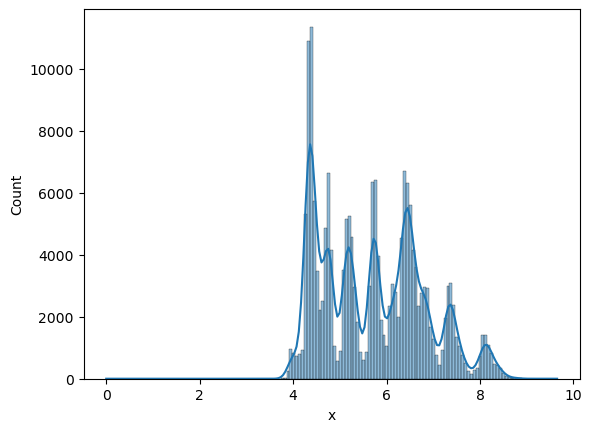

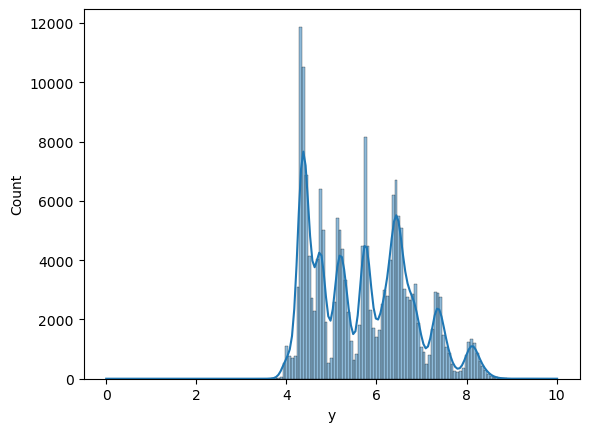

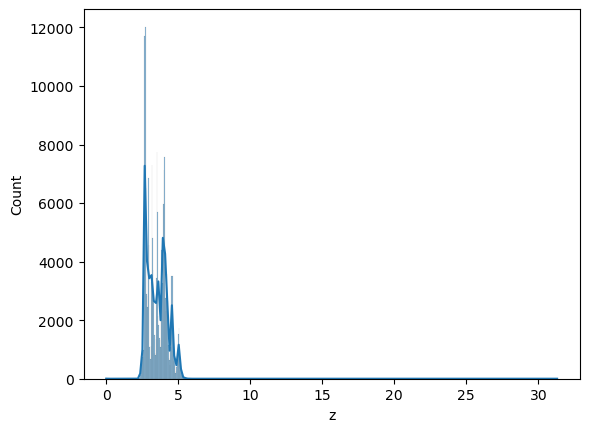

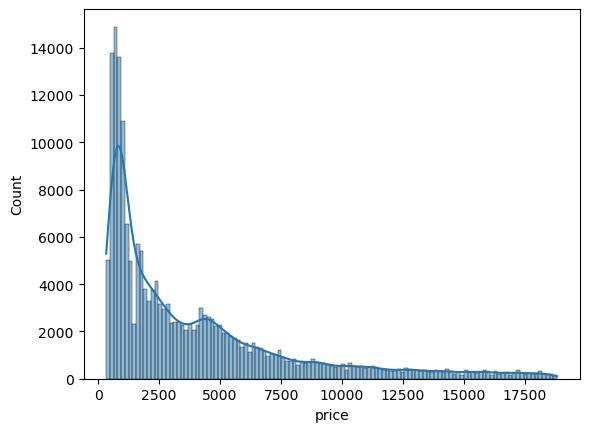

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for i in num_cols:
    sns.histplot(df,x=i,kde=True)
    print('\n')
    plt.show()

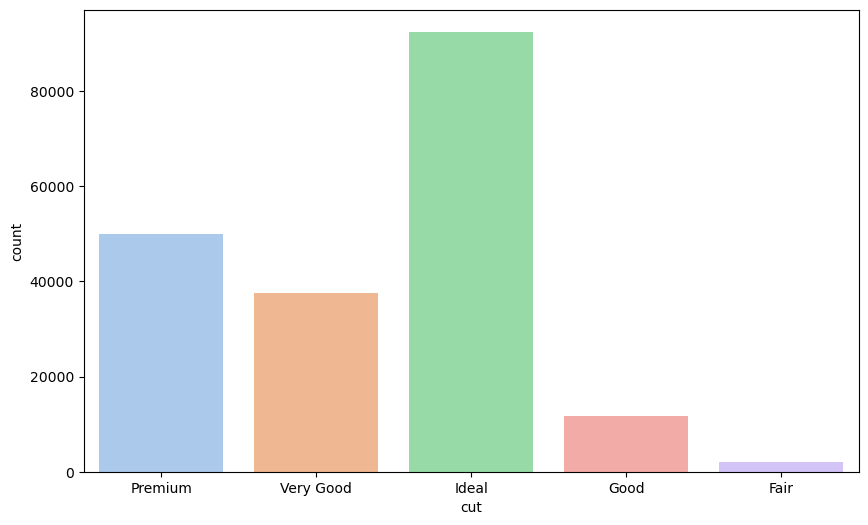

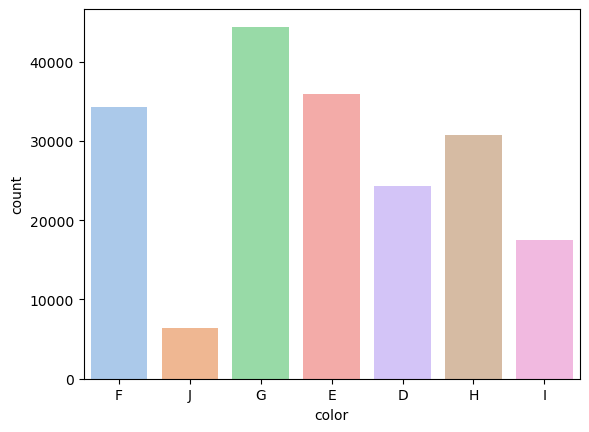

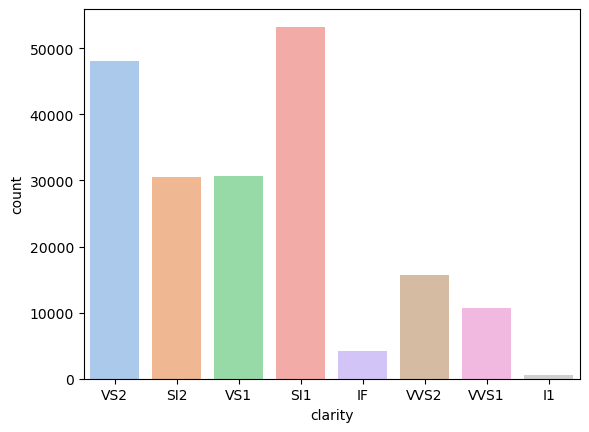

In [52]:
plt.figure(figsize=(10,6))

for i in cat_cols:
    sns.countplot(df, x=i, palette='pastel', hue=i)
    print('\n')
    plt.show()

<Axes: >

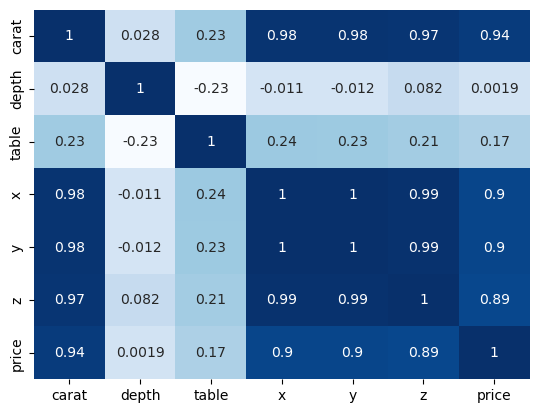

In [53]:
sns.heatmap(df[num_cols].corr(), annot=True, cbar=False, cmap='Blues')

In [54]:
# sorted(plt.colormaps())

In [55]:
cat_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [56]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [57]:
cut_map = {'Premium':0, 'Very Good':1, 'Ideal':2, 'Good':3, 'Fair':4}

In [58]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [59]:
# from sklearn.preprocessing import OrdinalEncoder

# ode = OrdinalEncoder()
# d = pd.DataFrame(ode.fit_transform(pd.DataFrame(df['color'])))

In [60]:
color_map = {'F':0, 'J':1, 'G':2, 'E':3, 'D':4, 'H':5, 'I':6}

In [61]:
df.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [62]:
clarity_map = {'VS2':0, 'SI2':1, 'VS1':2, 'SI1':3, 'IF':4, 'VVS2':5, 'VVS1':6, 'I1':7}

In [63]:
df['cut'] = df['cut'].map(cut_map)
df['color'] = df['color'].map(color_map)
df['clarity'] = df['clarity'].map(clarity_map)

In [64]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,0,0,0,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,1,1,1,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,2,2,2,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,2,2,2,61.6,56.0,4.38,4.41,2.71,666
4,1.70,0,2,0,62.6,59.0,7.65,7.61,4.77,14453


In [65]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [66]:
X = df.drop('price', axis=1)
y = df[['price']]

In [67]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [68]:
pipeline = Pipeline(
    steps = [
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    ]
)

preprocessor = ColumnTransformer([
    ('pipeline', pipeline, X.columns)
])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=30)

In [70]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [71]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.fit_transform(X_test), columns=preprocessor.get_feature_names_out())

In [72]:
X_train.head()

,pipeline__carat,pipeline__cut,pipeline__color,pipeline__clarity,pipeline__depth,pipeline__table,pipeline__x,pipeline__y,pipeline__z
0,-0.975439,0.652673,1.655662,1.604964,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150
1,0.235195,1.687566,0.056195,0.481725,1.833637,-0.121531,0.318447,0.279859,0.485354
2,0.494617,-1.417114,-0.476960,-0.079894,0.815855,0.399800,0.570855,0.606458,0.673737
3,-1.018676,-1.417114,-0.476960,-1.203134,0.260701,0.921131,-1.214034,-1.244270,-1.195605
4,-0.953821,0.652673,-1.010116,1.604964,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168


In [73]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [75]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [76]:
LR.coef_

array([[ 6547.72639107,   -10.80148742,  -181.09708299,   120.51544868,
         -236.70450559,  -179.53069282, -2121.79126005,  -549.50593089,
          -34.99094136]])

In [77]:
LR.intercept_

array([3970.76628955])

In [87]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet()
}

In [95]:
import numpy as np

def evaluate(actual,predicted):
    r2 = r2_score(actual, predicted)
    mse = mean_squared_error(actual,predicted)
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))

    return r2, mse, mae, rmse

In [98]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2, mse, mae, rmse = evaluate(y_test, y_pred)

    model_list.append(list(models.keys())[i])
    
    print(list(models.values())[i])
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2*100)
    print('MSE', mse)

    r2_list.append(r2)
    print('='*5)
    print('\n')

LinearRegression()
Model Training Performance
RMSE: 1198.825602366694
MAE: 726.3273075114536
R2 score 91.17712265428938
MSE 1437182.8248898666
=====


Lasso()
Model Training Performance
RMSE: 1198.7138823131654
MAE: 727.694707114495
R2 score 91.17876700756051
MSE 1436914.9716503012
=====


Ridge()
Model Training Performance
RMSE: 1198.8270353344162
MAE: 726.3544739725372
R2 score 91.17710156213721
MSE 1437186.2606487058
=====


ElasticNet()
Model Training Performance
RMSE: 1630.6279977102206
MAE: 1136.8274993039252
R2 score 83.67669810160378
MSE 2658947.666916443
=====


